In [1]:
import pandas as pd 

# Load in the dataset
data = pd.read_csv("Data.csv") 

# Preview the first 5 lines of the loaded data 
data.head()

,Unnamed: 0.1,Unnamed: 0,HOMO,LUMO,GAP,R2,ZPVE,U0,U,H,...,f1,f2,smiles,nN,nO,nHBAcc,nHBDon,TopoPSA,GGI1,Diameter
0,10000,10000,-0.2818,0.0280,0.3097,1109.2219,0.163679,-365.089448,-365.079822,-365.078877,...,0.010474,0.007055,CCC(C#N)C(C)O,1,1,2,1,44.02,2.0,4
1,10001,10001,-0.2338,0.0329,0.2667,1089.3310,0.175667,-345.190043,-345.180226,-345.179282,...,0.001335,0.042259,CCC(C#N)N(C)C,2,0,2,0,27.03,2.0,4
2,10002,10002,-0.2355,0.0301,0.2656,1055.7727,0.165093,-361.232458,-361.222832,-361.221888,...,0.001491,0.008953,CN(C)C(CN)C#N,3,0,3,1,53.05,2.0,4
3,10003,10003,-0.2497,0.0220,0.2716,1013.7067,0.152666,-381.108212,-381.099011,-381.098067,...,0.031047,0.029736,CN(C)C(CO)C#N,2,1,3,1,47.26,2.0,4
4,10004,10004,-0.2468,0.0315,0.2783,1158.4078,0.175927,-345.197890,-345.188039,-345.187095,...,0.005493,0.006682,CNC(C#N)C(C)C,2,0,2,1,35.82,2.0,4


In [2]:
# verify the shape
data.shape

(2500, 25)

In [3]:
# !pip install tensorflow --upgrade --force-reinstall

In [4]:
# pip install numpy

In [5]:
# pip install MiniSom

In [6]:
# pip install seaborn

In [7]:
from tensorflow import keras

import tensorflow as tf
import random as python_random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Input

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model 
from sklearn.model_selection import RandomizedSearchCV

import scipy.stats

import minisom
from minisom import MiniSom

import seaborn as sns

%matplotlib inline

<ipython-input-8-14de438b9230>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor3 = data.corr()


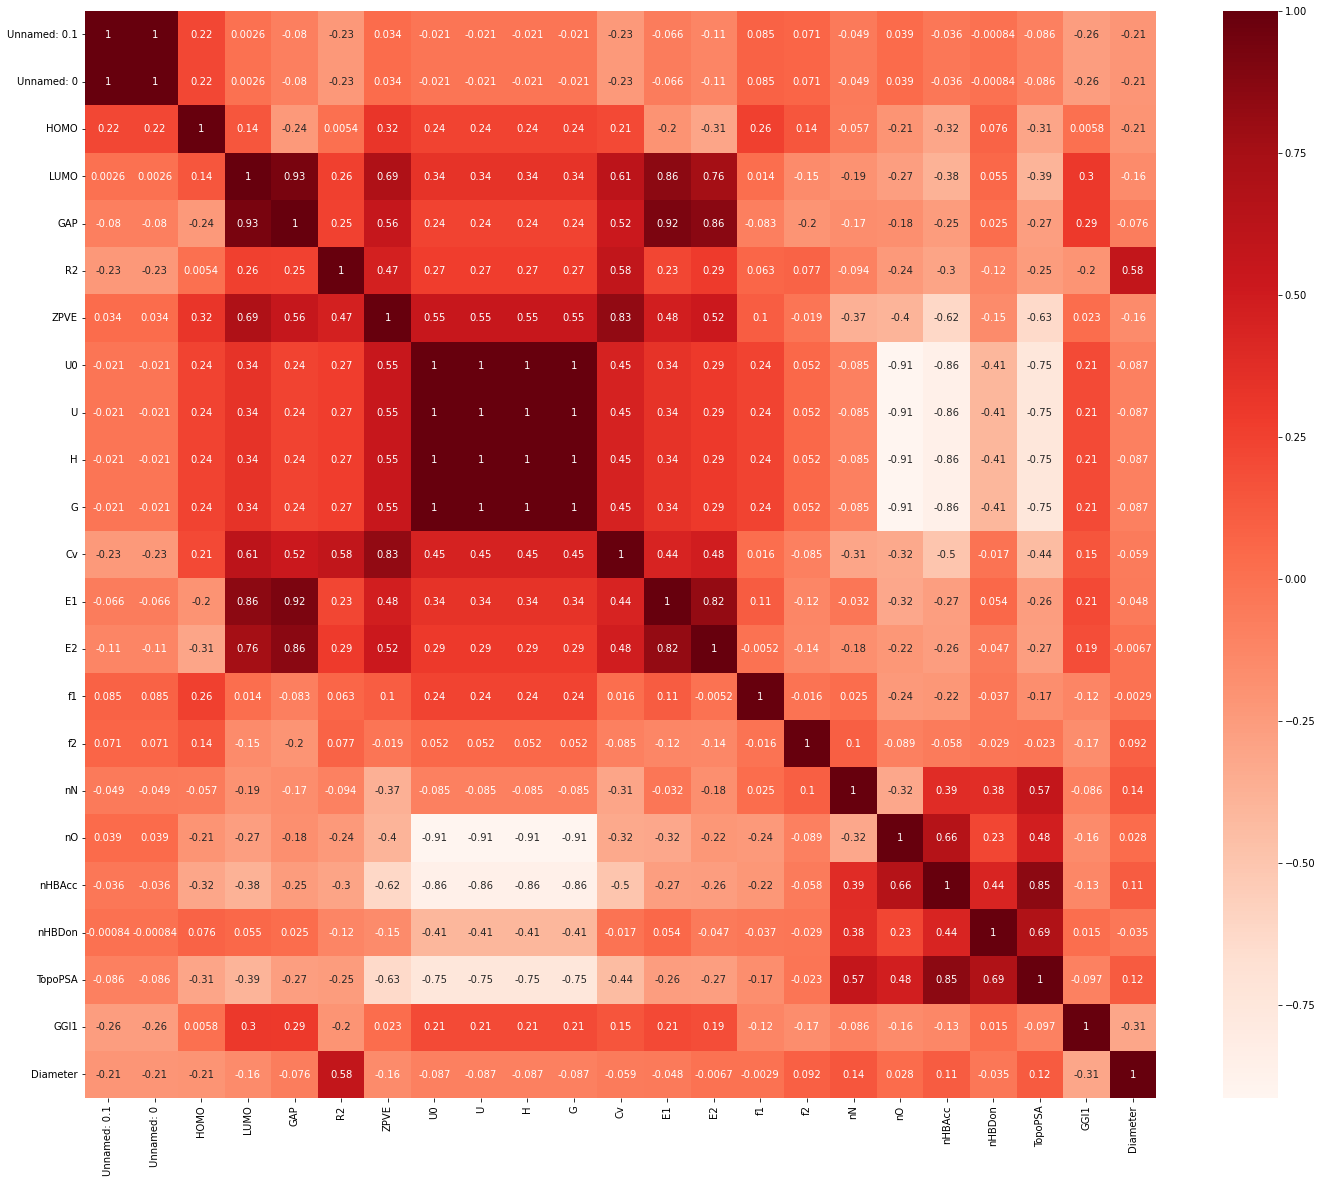

In [8]:
plt.figure(figsize=(24,20))
cor3 = data.corr()
sns.heatmap(cor3, annot=True, cmap=plt.cm.Reds)
plt.show()

**largeish pos**: Diameter/R2, TopoPSA/nHBAacc, GAP/E1,  E2/E1, ... ZPVE/LUMO  
**large neg**: nO/U0, nO/U, nO/H, nO/G, nHBAcc/U0,U,H,G, and TopoPSA/U0,TopoPSA/U,TopoPSA/H,TopoPSA/G

In [9]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,HOMO,LUMO,GAP,R2,ZPVE,U0,U,H,...,E2,f1,f2,nN,nO,nHBAcc,nHBDon,TopoPSA,GGI1,Diameter
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2.500000e+03,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,11249.50000,11249.50000,-0.246838,0.014175,0.261013,983.243663,0.142346,-374.732009,-374.724024,-374.723080,...,0.251776,0.015326,4.437974e-02,0.683600,1.434000,1.952800,0.759600,33.339416,2.395400,4.383200
std,721.83216,721.83216,0.017411,0.044946,0.045811,129.192730,0.028404,29.216172,29.216355,29.216355,...,0.032017,0.043178,7.605284e-02,0.795829,0.850137,0.884356,0.763964,17.286096,0.650329,0.619444
min,10000.00000,10000.00000,-0.328200,-0.103600,0.111100,727.077300,0.070916,-456.859049,-456.851772,-456.850827,...,0.100640,0.000000,-4.400000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,10624.75000,10624.75000,-0.256625,-0.022125,0.221500,892.565725,0.120009,-398.564304,-398.557375,-398.556431,...,0.235120,0.000448,4.738008e-03,0.000000,1.000000,1.000000,0.000000,20.230000,2.000000,4.000000
50%,11249.50000,11249.50000,-0.245400,0.015100,0.262650,957.812200,0.142041,-379.894742,-379.886620,-379.885676,...,0.258308,0.002670,1.301989e-02,1.000000,1.000000,2.000000,1.000000,33.020000,2.500000,4.000000
75%,11874.25000,11874.25000,-0.235900,0.051725,0.298900,1045.023650,0.163320,-349.030868,-349.023179,-349.022235,...,0.272260,0.011098,4.548643e-02,1.000000,2.000000,3.000000,1.000000,45.422500,3.000000,5.000000
max,12499.00000,12499.00000,-0.178400,0.098000,0.377800,1623.794700,0.245257,-309.385255,-309.377118,-309.376174,...,0.329823,0.481848,5.656127e-01,4.000000,4.000000,4.000000,4.000000,88.820000,4.000000,6.000000


This lets me know that each row does not have any missing values and thus does not need to drop any NaN's.  
Now, I will proceed to more thoroughly analyze the dataset via a sklearn feature selection to see what to relate.

# Section 1:

The dataset is a data set that was provided as a part of the class assignment. The dataset is assumed to be reliable.  
The exploratory analysis of the data is to figure out which variables correlate. Once I can figure out feature correlation, I can then start to build and test a hypothesis out of this data. I start this exploratory analysis by looking through the mordred descriptors to identify the descriptors that I wish to use to help elucidate certain relations out of the data.


# Section 2:

I decided to first use a feature correlations to get a visualization of correlations inside of the dataset. This helps me to see insights from the data. I used seaborns feature corrleation to draw correlation constants -1 to 1 of the dataset.  
From there, I found that:
- large pos: Diameter/R2, TopoPSA/nHBAacc, GAP/E1, E2/E1, ... ZPVE/LUMO  
- large neg: nO/U0, U, H, G, nHBAcc/U0,U,H,G, and TopoPSA/U0,U,H,G  

have considerable positive or negative correlations and I will pursue analyzing some of them.

I decided to first analyzing E1 and HOMO and LUMO to figure out predicted values of E1, which is useful as it a relatively simple metric to digest. I started by plotting E1 versus HOMO-LUMO (GAP energy). I then did train-test splitting and utilized random state 111 with a test size of 0.20, indicating 80 percent training and 20 percent testing. I normalized the data and then constructed a neural network and used hyperparameter tuning with 2 hidden nodes. I attempted to do so, and it broke my fittings and predictions, so while shown, it is removed and is not used.

I then utilized multilinear regression on E1 vs HOMO and LUMO to predict values which seemed to be pretty accurate, along with the regression fitting. I then proceeded to do a parity plot which shows the predicted E1 values, follow closely to the original, signalling a good fit. 

I then proceeded to utilize a SOM with using U0, U, H, and G in the training information. This showed me that the data tends to be clustered together showing that there might be a negative a correlation between these and the other terms utilized in the SOM, the polarity-affecting terms.

I compared E1 vs E2 to see if they statistically differ via a paired difference test and they do. However, when comparing the model predictions and such they have appreciable differences in loss and validation MSE, however, they are still quite low.

# Section 3:

**Results**: I am a little confused exactly about what I had found from this dataset. I had sought out to see if there was a relation between electronegativity to polarizability and atom length, however, that was not found. I had also sought to estimate E1 and E2 from HOMO and LUMO and was able to do so. I found that they are statistically different even though the values looked small enough and similar at a moments glance.

I could not show what the relation with regards to the presence of a negative correlation of electronegative atoms and if the thermodynamics went down. I did show that the data allowed me to test predictions of E1 and E2 from the GAP energies and my SOM allowed me to show some clustering of my data which showed I was vaguely onto something substantial with the best matching unit (6,5) however it is hard to determine the density of the points so looking at it visually it hard to discern. 

# Variables:  
    - HOMO = Highest occupied molecular orbital.
    - LUMO = Lowest occupied molecular orbital.
    - GAP = HOMO-LUMO.
    - ZPVE = Zero-point vibrational energy
    - U0 = bond energy.
    - U = internal energy.
    - H = enthalpy.
    - G = Gibbs free energy.
    - Cv = Constant volume heat capacity.
    - Vibrational frequencies = Vibrational frequencies
    - E1 = Energy of excited state 1.
    - E2 = Energy of excited state 2.
    - SMILES = character description of molecular composition.
    - nN = Number of nitrogen atoms.
    - nO = Number of oxygen atoms.
    - nHBAcc = Number of Hydrogen Bond acceptors.
    - nHBDon = Number of Hydrogen Bond donors.
    - TopoPSA = Topological polar surface area.
    - GGI1 = 1-ordered raw topological charge.
    - Diameter = topological diameter.

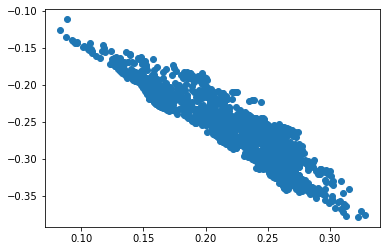

In [10]:
plt.scatter(data['E1'],data['HOMO']-data['LUMO']) # since the homo-lumo energy difference is small, there should not be too big or interesting results expected from here.

In [11]:
x = data[['HOMO', 'LUMO']].values
y = data['E1'].values
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=111)

In [12]:
scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

(array([ 2., 10., 34., 71., 55., 87., 92., 28., 65., 56.]),
 array([-0.1036 , -0.08344, -0.06328, -0.04312, -0.02296, -0.0028 ,
         0.01736,  0.03752,  0.05768,  0.07784,  0.098  ]),
 <BarContainer object of 10 artists>)

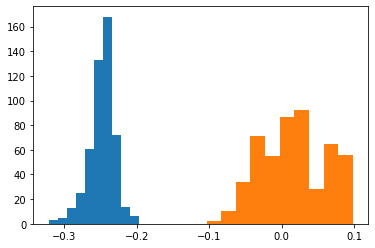

In [13]:
plt.hist(x_test[:,0])
plt.hist(x_test[:,1])

(array([ 2., 10., 34., 71., 55., 87., 92., 28., 65., 56.]),
 array([-2.60502761, -2.15780476, -1.71058191, -1.26335907, -0.81613622,
        -0.36891337,  0.07830947,  0.52553232,  0.97275517,  1.41997801,
         1.86720086]),
 <BarContainer object of 10 artists>)

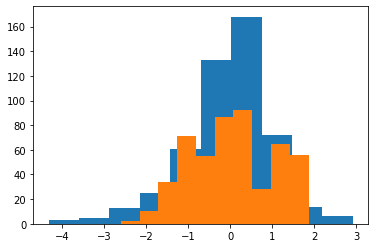

In [14]:
plt.hist(x_test_norm[:,0])
plt.hist(x_test_norm[:,1])

In [15]:
def nnmodel():
    model = Sequential()
    model.add(Dense(2, input_dim=x_train_norm.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [16]:
# parameters = {
#     "optimizer": ['Adam','SGD'],
#     "batch_size": np.arange(4,65).tolist(),
#     "learning_rate":(0.1,0.03,0.01,0.003,0.001,0.0003,0.0001),
#     "activation": ['tanh', 'relu'], 
#     "neurons":np.arange(4,21).tolist()
# }

In [17]:
# def nn_builder(optimizer='Adam',learning_rate=0.1, activation = 'relu', neurons = 10):
#     model = Sequential()
#     model.add(Input(shape=x_train_norm.shape[1])) # input
#     model.add(Dense(neurons, kernel_initializer='normal', activation=activation))
#     model.add(Dense(neurons, kernel_initializer='normal', activation=activation))
#     model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')) # output
#     optimizer = keras.optimizers.Adam(lr=learning_rate)
#     model.compile(loss='poisson', optimizer=optimizer,metrics=['accuracy'])
#     return model

In [18]:
# classifier_search = KerasClassifier(nn_builder)

In [19]:
# rnd_search_cv.best_params_

**Optimized hyperparameters**:  
{'optimizer': 'Adam',  
 'neurons': 17,  
 'learning_rate': 0.0001,  
 'batch_size': 23,  
 'activation': 'relu'}  
 ^Actually made much worse^

In [20]:
# optimal_model = rnd_search_cv.best_estimator_.model

In [21]:
# test_loss_optimal = optimal_model.evaluate(x_test_norm, y_test)
# print("test set error is %.2f" % test_loss_optimal[0])

In [22]:
np.random.seed(111)
estimator = KerasRegressor(build_fn=nnmodel)
history = estimator.fit(x_train_norm, y_train, validation_split=0.33, epochs=20, batch_size=32)

<ipython-input-22-9c51327e0366>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasRegressor(build_fn=nnmodel)


Epoch 1/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0343 - val_loss: 0.0182
Epoch 2/20
42/42 [==============================] - 0s 1ms/step - loss: 0.0072 - val_loss: 0.0018
Epoch 3/20
42/42 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.1687e-04
Epoch 4/20
42/42 [==============================] - 0s 991us/step - loss: 6.5697e-04 - val_loss: 4.8176e-04
Epoch 5/20
42/42 [==============================] - 0s 1ms/step - loss: 5.0966e-04 - val_loss: 4.1222e-04
Epoch 6/20
42/42 [==============================] - 0s 1ms/step - loss: 4.4971e-04 - val_loss: 3.7819e-04
Epoch 7/20
42/42 [==============================] - 0s 1ms/step - loss: 4.1539e-04 - val_loss: 3.5573e-04
Epoch 8/20
42/42 [==============================] - 0s 1ms/step - loss: 3.9026e-04 - val_loss: 3.3690e-04
Epoch 9/20
42/42 [==============================] - 0s 1ms/step - loss: 3.6879e-04 - val_loss: 3.1907e-04
Epoch 10/20
42/42 [==============================] - 0s 1ms/step

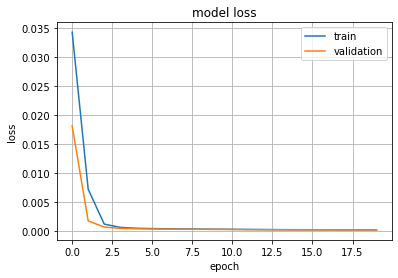

In [23]:
plt.plot(range(20),history.history['loss'])
plt.plot(range(20),history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch') #epoch
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

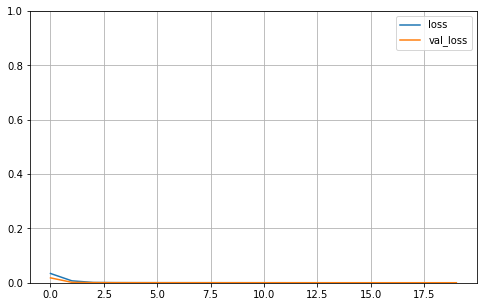

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [25]:
print("final MSE for train is %.2f and for validation is %.7f" % 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

final MSE for train is 0.00 and for validation is 0.0002303


In [26]:
test_loss = estimator.model.evaluate(x_test_norm, y_test)
print("test set mse is %.2f" % test_loss)

16/16 [==============================] - 0s 555us/step - loss: 2.3710e-04
test set mse is 0.00


In [27]:
y_test_predict = estimator.predict(x_test_norm)

16/16 [==============================] - 0s 509us/step


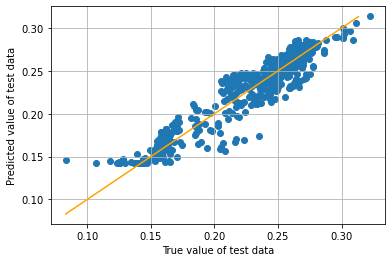

In [28]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("True value of test data")
plt.ylabel("Predicted value of test data")
plt.plot(np.arange(min(y_test),max(y_test),0.01),np.arange(min(y_test),max(y_test),0.01),c='orange')
plt.grid()

I am going to now do a linear regression fitting.

Text(0.5, 0.92, 'First Excitation Energy vs HOMO and LUMO in week9data')

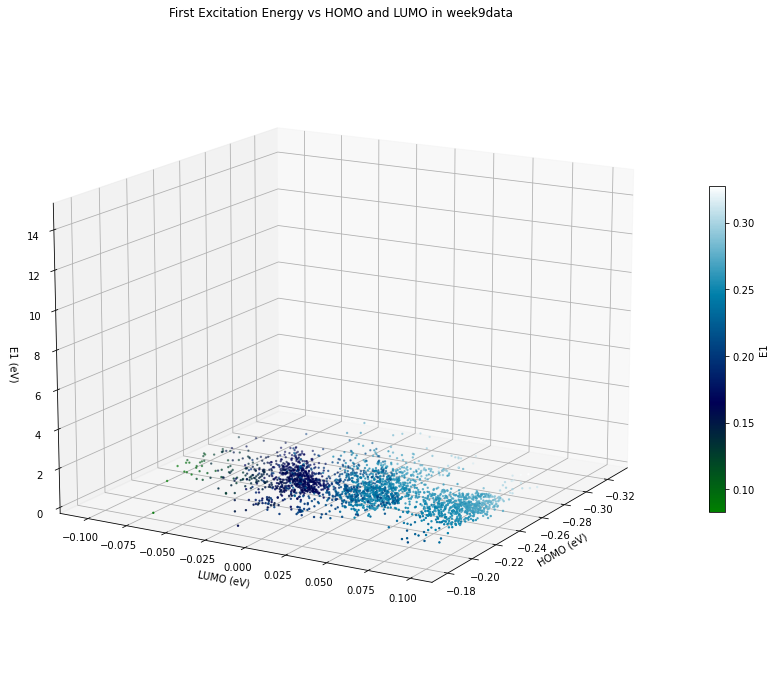

In [29]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d',zlim = [0,15])
plot1=ax.scatter3D(data['HOMO'], data['LUMO'], data['E1'], s=2, c=data['E1'], cmap='ocean')
cbar=plt.colorbar(plot1, shrink=0.5)
cbar.set_label('E1')
ax.view_init(15,30)
ax.set_xlabel('HOMO (eV)')
ax.set_ylabel('LUMO (eV)')
ax.set_zlabel('E1 (eV)')
ax.set_title('First Excitation Energy vs HOMO and LUMO in week9data')

In [30]:
modelmulti = linear_model.LinearRegression()

In [31]:
#Step 3
X = data[['HOMO','LUMO']]
X.shape

(2500, 2)

In [32]:
y = data['E1']
y.shape

(2500,)

In [33]:
#Step 4
modelmulti.fit(X,y)

LinearRegression()

In [34]:
modelmulti.intercept_

-0.007207065439516797

In [35]:
modelmulti.coef_

array([-0.8677035,  0.9143292])

Text(0.5, 0.92, 'Regression Fitting of First Excitation Energies vs HOMO and LUMO in week9data')

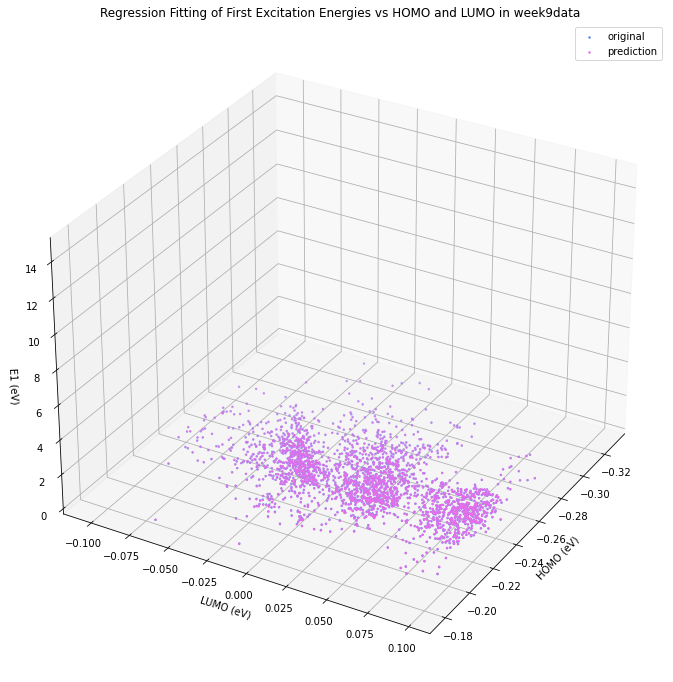

In [36]:
plt.figure(figsize=(15,12))
ax = plt.axes(projection = '3d')
ax = plt.axes(projection='3d')
plot1=ax.scatter3D(data['HOMO'], data['LUMO'], data['E1'], s=2, 
                   c='#5284F2', label='original')
plot2=ax.scatter3D(data['HOMO'], data['LUMO'],
                   modelmulti.predict(data[['HOMO','LUMO']]), c='#EA6EEA', s=2, 
                   label='prediction')
ax.view_init(30,30)
ax.set_xlabel('HOMO (eV)')
ax.set_ylabel('LUMO (eV)')
ax.set_zlabel('E1 (eV)')
ax.set_zlim(0,15)
ax.legend()
ax.set_title('Regression Fitting of First Excitation Energies vs HOMO and LUMO in week9data')

From these, it appears that the E1 data and HOMO/LUMO values are much better fit to the model than that produced in the qm7b dataset, not entirely sure why. My best guess is that it is generated via the same level of theory.  
Now I will make a parity plot to fully explore that these values are really similar.

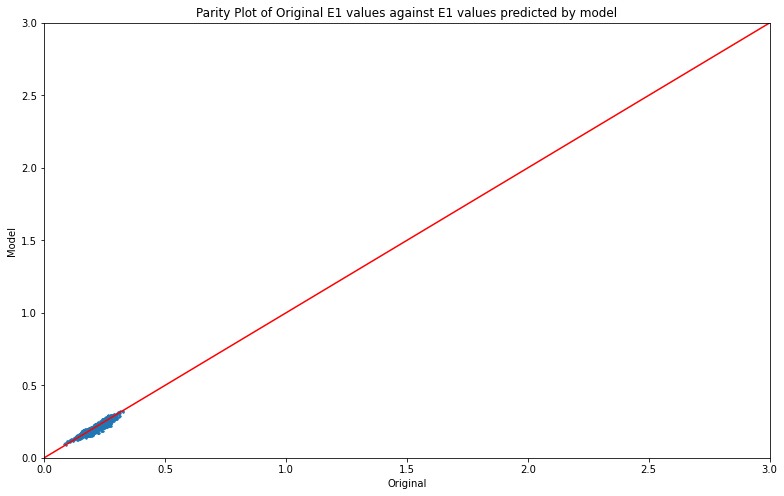

beta_0, beta_i:  -0.007207065439516797 [-0.8677035  0.9143292]


In [37]:
plt.figure(figsize=(13,8))
plt.title('Parity Plot of Original E1 values against E1 values predicted by model')
plt.xlim(0,3)
plt.ylim(0,3)
plt.scatter(data['E1'],modelmulti.predict(data[['HOMO','LUMO']]), s=2)
plt.xlabel('Original')
plt.ylabel('Model')

plt.plot(np.linspace(0,3,14),np.linspace(0,3,14), c='r')
plt.show()
print('beta_0, beta_i: ', modelmulti.intercept_, modelmulti.coef_)

This above shows that the values are nearly exactly what is estimated.  

Now I will proceed to attempt to elucidate the relationship with nO and U0, U, H, and G. It has such a high negative correlation, -0.91. 

In [38]:
SOM = pd.read_csv('Data.csv')

In [39]:
sub = SOM[['U0', 'U', 'H','G','nO','nN','nHBAcc','nHBDon','TopoPSA']].copy()
sub.dropna(inplace=True)

sub['index']=list(range(len(sub)))
sub.set_index('index',drop=True,inplace=True)

In [40]:
traindata = sub[['U0','U','H','G']].values
traindata = (traindata - np.mean(traindata, axis=0)) / np.std(traindata, axis=0)

In [41]:
# Define a SOM
height = 10
width = 10
# Define a MiniSom object
som = MiniSom(width, height, traindata.shape[1], sigma=1.0, learning_rate=0.5,neighborhood_function='gaussian', random_seed=0) 

# Initialize the weights by PCA
som.pca_weights_init(traindata)

# trains the SOM with 400 iterations
som.train(traindata, 400) 

In [42]:
som.winner(traindata[0])

(3, 6)

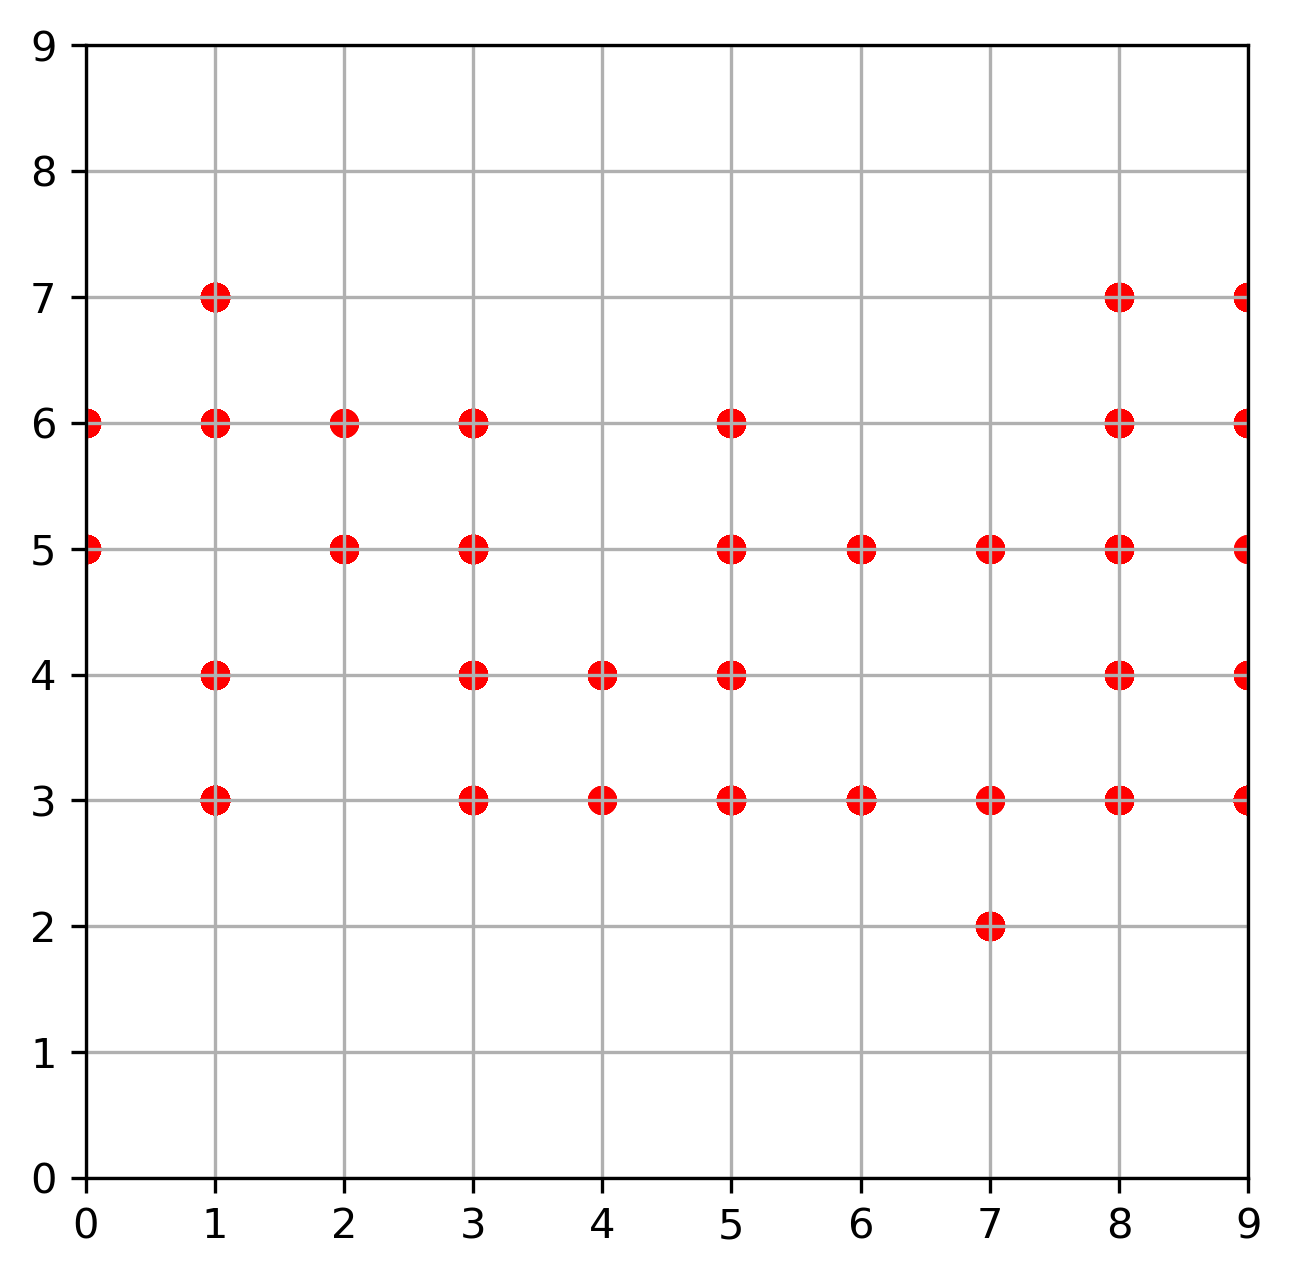

In [43]:
fig = plt.figure(figsize=(5, 5),dpi=300)
ax = fig.add_subplot(111)

for index, datapoint in enumerate(traindata):
    # find the best matching unit of the datapoint
    w = som.winner(datapoint)
    x_coord = w[0]
    y_coord = w[1]
    
    #plot the best matching unit
    plt.scatter(x_coord,y_coord,c='red')
    
#visualize the grid    
plt.ylim(0,height-1)
plt.xlim(0,width-1)
ax.set_xticks(range(width))
ax.set_yticks(range(height))
plt.grid()

In [44]:
print('Topographic error: ', som.topographic_error(traindata))
print('Quantization error: ', som.quantization_error(traindata))

Topographic error:  0.3168
Quantization error:  0.06084489857639935


In [45]:
size_list = np.arange(5,25,1)
te = [0]*len(size_list)
qe = [0]*len(size_list)

for i in range(len(size_list)):
    som = MiniSom(size_list[i], size_list[i], traindata.shape[1], sigma=1.0, learning_rate=0.5,neighborhood_function='gaussian', random_seed=0)
    som.pca_weights_init(traindata)
    som.train(traindata, 400)
    te[i] = som.topographic_error(traindata)
    qe[i] = som.quantization_error(traindata)

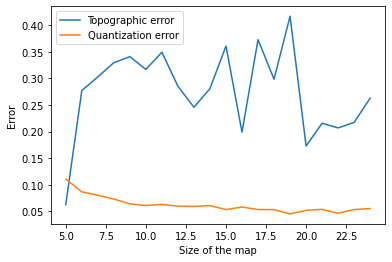

In [46]:
plt.plot(size_list,te,label='Topographic error')
plt.plot(size_list,qe,label='Quantization error')
plt.xlabel('Size of the map')
plt.ylabel('Error')
plt.legend()
plt.show()

Looking at the topographic error and quantization error above, the quantization error is rather low which is good meaning that each data points and its best matching unit is lower. However, the topographic error, is steadily increasing.

I will next proceed to investigate E1 vs E2 slightly.

In [47]:
data['E1'].mean()

0.21993578121199997

In [48]:
data['E2'].mean()

0.251776406104

In [49]:
scipy.stats.ttest_rel(data['E1'],data['E2'])

TtestResult(statistic=-60.3356430542031, pvalue=0.0, df=2499)

#### Same test as E1 but for E2

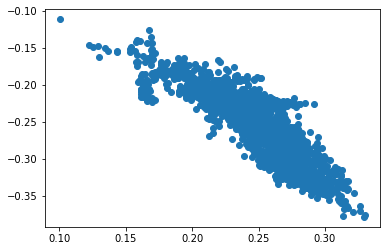

In [50]:
plt.scatter(data['E2'],data['HOMO']-data['LUMO']) # since the homo-lumo energy difference is small, there should not be too big or interesting results expected from here.

In [51]:
x = data[['HOMO', 'LUMO']].values
y = data['E2'].values
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=111)

In [52]:
scaler = StandardScaler().fit(x_train)
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

(array([ 2., 10., 34., 71., 55., 87., 92., 28., 65., 56.]),
 array([-0.1036 , -0.08344, -0.06328, -0.04312, -0.02296, -0.0028 ,
         0.01736,  0.03752,  0.05768,  0.07784,  0.098  ]),
 <BarContainer object of 10 artists>)

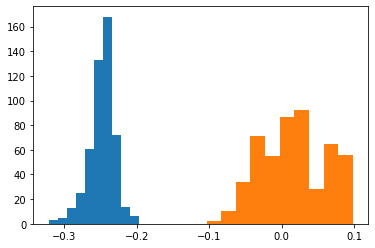

In [53]:
plt.hist(x_test[:,0])
plt.hist(x_test[:,1])

(array([ 2., 10., 34., 71., 55., 87., 92., 28., 65., 56.]),
 array([-2.60502761, -2.15780476, -1.71058191, -1.26335907, -0.81613622,
        -0.36891337,  0.07830947,  0.52553232,  0.97275517,  1.41997801,
         1.86720086]),
 <BarContainer object of 10 artists>)

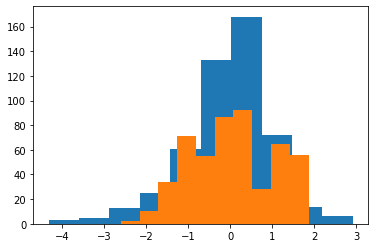

In [54]:
plt.hist(x_test_norm[:,0])
plt.hist(x_test_norm[:,1])

In [55]:
def nnmodel2():
    model = Sequential()
    model.add(Dense(2, input_dim=x_train_norm.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [56]:
np.random.seed(111)
estimator2 = KerasRegressor(build_fn=nnmodel2)
history2 = estimator2.fit(x_train_norm, y_train, validation_split=0.33, epochs=20, batch_size=32)

Epoch 1/20


<ipython-input-56-14a9db135990>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator2 = KerasRegressor(build_fn=nnmodel2)


42/42 [==============================] - 0s 2ms/step - loss: 0.0482 - val_loss: 0.0308
Epoch 2/20
42/42 [==============================] - 0s 1ms/step - loss: 0.0157 - val_loss: 0.0045
Epoch 3/20
42/42 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0012
Epoch 4/20
42/42 [==============================] - 0s 1ms/step - loss: 9.2691e-04 - val_loss: 6.3165e-04
Epoch 5/20
42/42 [==============================] - 0s 1ms/step - loss: 5.6348e-04 - val_loss: 4.3656e-04
Epoch 6/20
42/42 [==============================] - 0s 965us/step - loss: 4.4771e-04 - val_loss: 3.6782e-04
Epoch 7/20
42/42 [==============================] - 0s 989us/step - loss: 4.0720e-04 - val_loss: 3.3616e-04
Epoch 8/20
42/42 [==============================] - 0s 973us/step - loss: 3.8499e-04 - val_loss: 3.1520e-04
Epoch 9/20
42/42 [==============================] - 0s 1ms/step - loss: 3.6666e-04 - val_loss: 3.0301e-04
Epoch 10/20
42/42 [==============================] - 0s 971us/step - loss: 

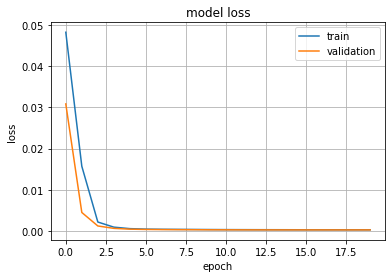

In [57]:
plt.plot(range(20),history2.history['loss'])
plt.plot(range(20),history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch') #epoch
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()
plt.show()

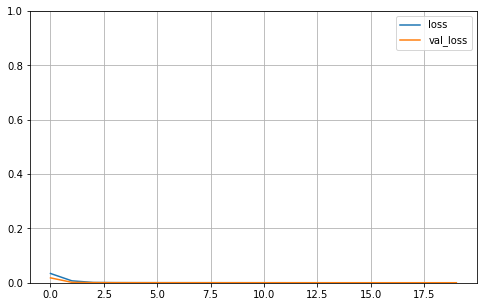

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [59]:
print("final MSE for train is %.2f and for validation is %.7f" % 
      (history2.history['loss'][-1], history2.history['val_loss'][-1]))

final MSE for train is 0.00 and for validation is 0.0002583


In [60]:
test_loss = estimator2.model.evaluate(x_test_norm, y_test)
print("test set mse is %.2f" % test_loss)

16/16 [==============================] - 0s 597us/step - loss: 2.3988e-04
test set mse is 0.00


In [61]:
y_test_predict = estimator2.predict(x_test_norm)

16/16 [==============================] - 0s 469us/step


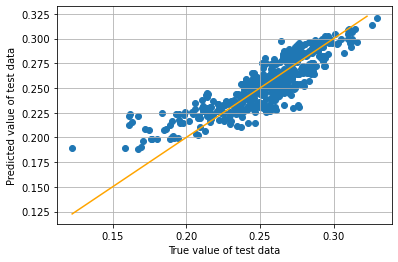

In [62]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("True value of test data")
plt.ylabel("Predicted value of test data")
plt.plot(np.arange(min(y_test),max(y_test),0.01),np.arange(min(y_test),max(y_test),0.01),c='orange')
plt.grid()

From the two analysis, there does not seem to be much appreciable difference. E2 has a lower validation MSE and lower test loss, however, it does not seem to do considerably different. Albeit, E1 and E2 are statistically significantly different.

It would be hard to go much further with this data analysis and do it meaningfully.

#### TopoPSA vs nHBAcc

In [63]:
data['TopoPSA'].mean()

33.339416

In [64]:
data['nHBAcc'].mean()

1.9528